In [13]:
import datetime

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader
import sklearn
import sklearn.linear_model
import sklearn.model_selection

In [14]:
# datareader을 통해 데이터 받아옴
df_aapl = pandas_datareader.data.DataReader('AAPL', 'yahoo', '2014-11-01')
df_fb = pandas_datareader.data.DataReader('FB', 'yahoo', '2014-11-01')
df_gold = pandas_datareader.data.DataReader('GLD', 'yahoo', '2014-11-01')

In [15]:
df_aapl.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-11,169.029999,165.500000,168.710007,165.750000,72088900.0,165.750000
2022-04-12,169.869995,166.929993,168.020004,169.560303,18290695.0,169.560303


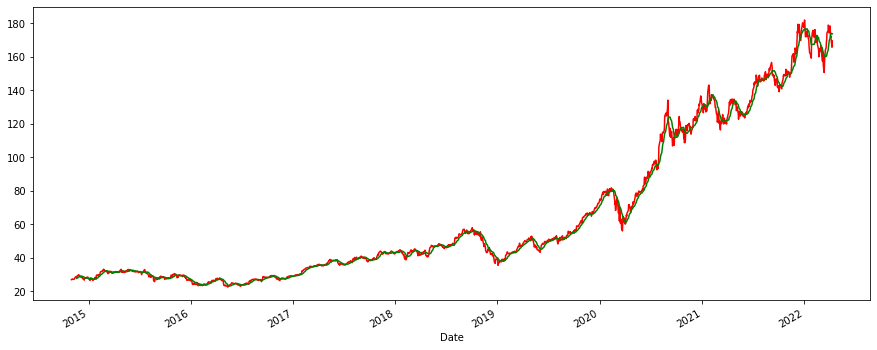

In [16]:
df_aapl['SMA'] = df_aapl['Close'].rolling(window=14).mean()
df_aapl['Close'].plot(figsize=(15, 6), color='red') # close 된 주가 표시 '붉은색'
df_aapl['SMA'].plot(figsize=(15, 6), color='green') # 과거 14일간의 평균
plt.show()

In [17]:
# 그래프의 단순 통계적인 이해 = 녹색은 14일간 평균으로 이 녹색선 기준으로 붉은 선이 내려가면 팔고 올라가면 샀다는 의미로 볼 수 있음

In [18]:
# 데이터 마이닝
df_aapl['change'] = (((df_aapl['Close'] - df_aapl['Open'])) / (df_aapl['Open']) * 100) # 시장의 열리고 닫히기 전까지의 오른 %
df_fb['change'] = (((df_fb['Close'] - df_fb['Open'])) / (df_fb['Open']) * 100)
df_gold['change'] = (((df_gold['Close'] - df_gold['Open'])) / (df_gold['Open']) * 100)
df_aapl.tail(2).round(2)

,High,Low,Open,Close,Volume,Adj Close,SMA,change
Date,,,,,,,,
2022-04-11,169.03,165.50,168.71,165.75,72088900.0,165.75,173.83,-1.75
2022-04-12,169.87,166.93,168.02,169.56,18290695.0,169.56,173.78,0.92


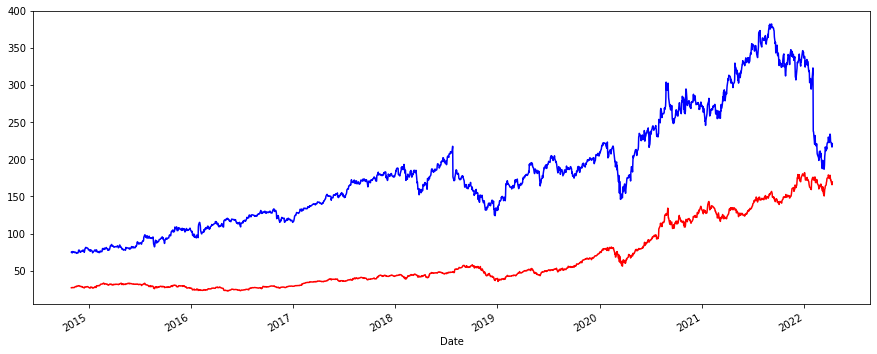

In [19]:
df_aapl['Close'].plot(figsize=(15, 6), color="red")
df_fb['Close'].plot(figsize=(15, 6), color="blue")
plt.show()

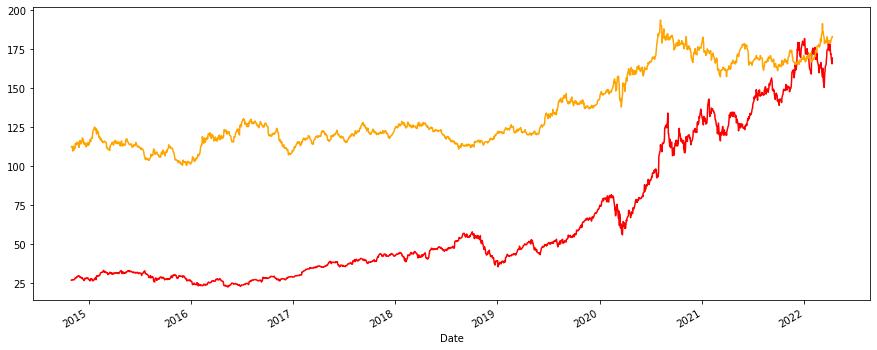

In [20]:
df_aapl['Close'].plot(figsize=(15, 6), color="red")
df_gold['Close'].plot(figsize=(15, 6), color="orange")
plt.show()

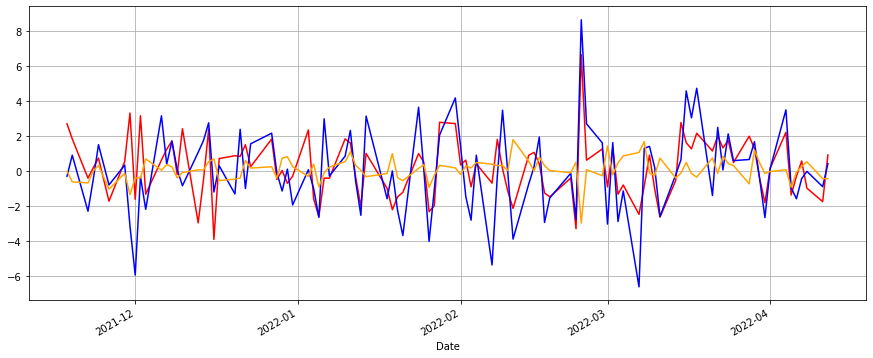

In [21]:
df_aapl['change'].tail(100).plot(grid=True, figsize=(15, 6), color='red')
df_fb['change'].tail(100).plot(grid=True, figsize=(15, 6), color='blue')
df_gold['change'].tail(100).plot(grid=True, figsize=(15, 6), color='orange')
plt.show()

In [23]:
df_aapl['label'] = df_aapl['Close'].shift(-30)
df_aapl.tail(40)

,High,Low,Open,Close,Volume,Adj Close,SMA,change,label
Date,,,,,,,,,
2022-02-15,172.949997,170.250000,170.970001,172.789993,62527400.0,172.789993,171.804999,1.064510,177.770004
2022-02-16,173.339996,170.050003,171.850006,172.550003,61177400.0,172.550003,172.757142,0.407330,174.610001
2022-02-17,171.910004,168.470001,171.029999,168.880005,69589300.0,168.880005,172.653571,-1.257086,174.309998
2022-02-18,170.539993,166.190002,169.820007,167.300003,82772700.0,167.300003,172.119286,-1.483927,178.440002
2022-02-22,166.690002,162.149994,164.979996,164.320007,91162800.0,164.320007,171.384286,-0.400041,175.059998
2022-02-23,166.149994,159.750000,165.539993,160.070007,90009200.0,160.070007,170.257858,-3.304329,171.830002
2022-02-24,162.850006,152.000000,152.580002,162.740005,141147500.0,162.740005,169.532145,6.658804,172.139999
2022-02-25,165.119995,160.869995,163.839996,164.850006,91974200.0,164.850006,168.993574,0.616461,170.089996
2022-02-28,165.419998,162.429993,163.059998,165.119995,95056600.0,165.119995,168.526430,1.263337,165.750000


In [25]:
# 기계학습

X = np.array(df_aapl.drop(['label', 'SMA'], axis = 1)) # 예전에 처리한 label과 SMA drop 해서 없이 입력받음
X = sklearn.preprocessing.scale(X) # 데이터의 튀는 값 삭제. 의미있는 데이터만 입력

predict_data = X[-30:] # NaN 사용예정
X = X[:-30] # 과거 30일까지만 - NaN 이 아닌 입력 데이터
Y = np.array(df_aapl['label']) 
Y = Y[:-30] # 30일간 shift한 값으로 정답값이 있음

# x, y로 훈련용 데이터와 test용 데이터로 나눈다.
# 총 데이터에서 20%만 추림.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2)

lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, Y_train) # 기계학습 가동

# 기계학습의 데이터의 정확성 0.97795... -> 97% 정확도
accuracy = lr.score(X_test, Y_test)
accuracy

0.9779559825151282

In [26]:
# 예측 데이터
predicted_data = lr.predict(predict_data)
predicted_data

array([171.16288562, 171.9937603 , 169.13384354, 165.1536323 ,
       163.49413647, 167.2133621 , 162.28679737, 160.43621686,
       158.38948694, 159.97417602, 162.55885163, 166.0437131 ,
       168.87894016, 171.61534642, 173.75584846, 176.58870243,
       178.63321642, 180.34123875, 180.80682846, 184.5957633 ,
       183.63924568, 180.28401609, 178.96326404, 183.26819424,
       180.56515368, 177.15965204, 177.60901281, 175.66766156,
       171.68851242, 174.65055287])

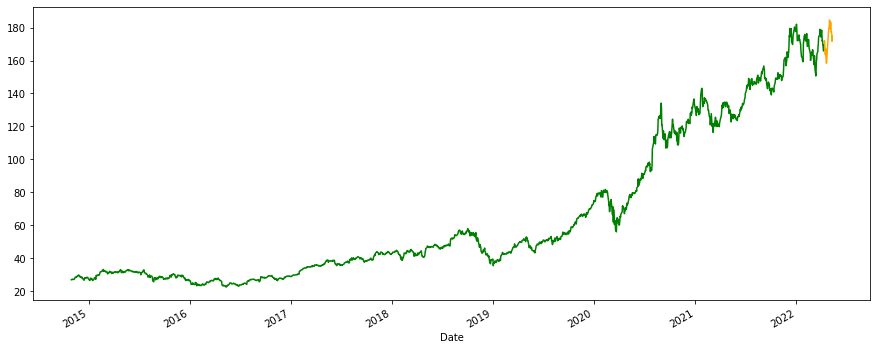

In [27]:
df_aapl['Predict'] = np.nan

last_date = df_aapl.iloc[-1].name # 마지막 날짜 입력

one_day = 86400 # 1일 합
next_unix = last_date.timestamp() + one_day

for data in predicted_data:
    next_data = datetime.datetime.fromtimestamp(next_unix) # 다음날 timestamp에
    next_unix += one_day # 1일을 더함
    df_aapl.loc[next_data] = np.append([np.nan] * (len(df_aapl.columns) - 1), data)

df_aapl['Close'].plot(figsize=(15, 6), color="green")
df_aapl['Predict'].plot(figsize=(15, 6), color="orange")
plt.show()

In [ ]:
# https://www.tenserflow.org/tutorials/deep_cnn
# REST API 를 통해 주식 증권 api 를 구매하면 사용가능